In [134]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import hypergeom
from scipy.stats import poisson
from scipy.stats import nbinom
import pandas as pd
import numpy as np
import sympy as sp
from sympy import *
sp.init_printing()
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
from fractions import Fraction
import numpy as np
from scipy.misc import derivative
import math
from math import *
from fractions import Fraction
import fractions
from sympy import Rational as R
from sympy import Matrix as M
from IPython.display import display, Math, Latex
%matplotlib inline
from IPython.display import Image, HTML
import statsmodels.stats.power as smp
import statsmodels.api as sm

In [33]:
# Let us create a UDF which will enable us to shade areas under the curve for standardnormal distribution

def draw_z_score(x, cond, mu, sigma, title):
    y = norm.pdf(x, mu, sigma)
    z = x[cond]
    plt.plot(x, y)
    plt.ticklabel_format(style='plain', useOffset=False, axis='x')
    plt.yticks([])
    plt.fill_between(z, norm.pdf(z, mu, sigma))
    plt.title(title)
    plt.show()

In [34]:
# Let us create a UDF which will enable us to shade areas under the curve for t-distribution

def draw_t_score(x, df, cond, mu, sigma, title):
    y = t.pdf(x, df, mu, sigma)
    t = x[cond]
    plt.plot(x, y)
    plt.ticklabel_format(style='plain', useOffset=False, axis='x')
    plt.yticks([])
    plt.fill_between(t, t.pdf(t, df, mu, sigma))
    plt.title(title)
    plt.show()

## Exercise 1

In [2]:
display(Image(url='../images/Screenshot 2023-06-06 at 18.44.07.png', width=1200, height=400,unconfined=True))

In [4]:
## a 
## P(X>0) = P(X=1)+P(X=2)
p_x= 0.3 + 0.5
print(p_x)
x = [0, 1, 2]
p = [0.2, 0.3, 0.5]

mean = sum(x_i * p_i for x_i, p_i in zip(x, p))

squared_diffs = [(x_i - mean) ** 2 for x_i in x]
weighted_squared_diffs = [diff * p_i for diff, p_i in zip(squared_diffs, p)]
variance = sum(weighted_squared_diffs)

print(variance)


0.8
0.6100000000000001


In [7]:
## b
## P(X < 2, X > 1) = P(X=0) + P(X=1) * P(Y=2)
p = 0.5 * 0.3
print(p)

px= 0.2 + 0.3
py= 0.3 + 0.4

## P(X < 2 or X > 1) = (P(X=0) + P(X=1)) - ( P(X=0) + P(X=1)) * P(Y=0) + P(XY=1) )
p_x_y= px + py -( px * py)
print(p_x_y)



0.15
0.85


## Formula </br>
Cov(X,Y) = E[XY] - EX - EY </br>
Cov(2X−5Y,7X+4Y+1) = E[(2X - 5Y)(7X + 4Y + 1)] - E[2X - 5Y]E[7X + 4Y + 1]

In [123]:
display(Image(url='../images/Screenshot 2023-06-07 at 14.40.06.png', width=1200, height=400,unconfined=True))

## Exercise 2

In [15]:
display(Image(url='../images/Screenshot 2023-06-06 at 20.37.27.png', width=1200, height=400,unconfined=True))

In [19]:
x,y = sp.symbols('x,y ')

f_x_y =2*(x+y)
ey = y*f_x_y

res = sp.integrate(ey, (y,0,x), (x,0,1))
display(res)

## aplying LOTUS
lotus_func = f_x_y * x * y
res = sp.integrate(lotus_func, (y,0,x), (x,0,1))
display(res)


## Exercise 3

In [132]:
display(Image(url='../images/Screenshot 2023-06-06 at 21.05.15.png', width=1200, height=400,unconfined=True))

In [121]:
## a 
## g(x) = e**(2x)
## f(x) = 3*e**(-3*x) = >  pdf of exponential, in our case with lambda = 3

## apply LOTUS = > integral(g(x)*f(x),(x,0,oo)) =>

g_x= e**(2*x)
f_x = 3*e**(-3*x)

result = sp.integrate(g_x*f_x,  (x,0, sp.oo))
display(result)

## b 
## Always start with CDF first:
# P(Y<y) = P(e**(2*x)<y)/*ln = P(2X< ln y) = P(X < (ln y)/2) = integral(fx, (x, 0, (ln y)/2)

F_y = sp.integrate(f_x,(x,0, sp.ln(y)*R(1,2)))
display(F_y)
## there is a property that the e to the power of ln cancel's out
F_y = 1- y**(-3/2)
f_y = sp.diff(F_y)
display(f_y)

## Exercise 4

In [131]:
display(Image(url='../images/Screenshot 2023-06-07 at 22.05.19.png', width=1200, height=400,unconfined=True))

In [142]:
P_transaction_matrix = M([[0.3,0.3,0.4],
                            [0 ,0.4,0.6],
                            [0 ,0.2,0.8]])
second_gen_matrix = P_transaction_matrix**2

display(second_gen_matrix)

print(second_gen_matrix.row(0)[2])

⎡0.09  0.29  0.62⎤
⎢                ⎥
⎢ 0    0.28  0.72⎥
⎢                ⎥
⎣ 0    0.24  0.76⎦

0.620000000000000


In [149]:
## b 
P_power_0 = M([[-R(7,10), 0,R(8,10),0],
                [R(3,10),-R(6,10),R(2,10),0],
                [R(4,10),R(6,10),-1,0],
                [1,1,1,1]])

pi = P_power_0.rref()[0][:, -1].T
display(round(pi[0],3))
display(round(pi[1],3))
display(round(pi[2],3))


## Exercise 5

In [32]:
display(Image(url='../images/Screenshot 2023-06-07 at 10.45.36.png', width=1200, height=200,unconfined=True))

display(Image(url='../images/Screenshot 2023-06-07 at 10.45.42.png', width=1200, height=200,unconfined=True))

Two sided CI formula </br>
Upper: $\overline{x}$ + $z_{1- \frac{\alpha}{2}}$ *  $\frac{\sigma}{\sqrt{n}}$ </br>
Lower: $\overline{x}$ - $z_{1- \frac{\alpha}{2}}$ *  $\frac{\sigma}{\sqrt{n}}$ 

99%: $z_{1- \frac{\alpha}{2}}$ = 2.58 </br>

Upper: 74.036 + 2.58 *  $\frac{0.001}{\sqrt{15}}$ </br>
Lower: 74.036 - 2.58 *  $\frac{0.001}{\sqrt{15}}$ </br>

74.036 - 2.58 *  $\frac{0.001}{\sqrt{15}}$ $\leq$ $\mu$ $\leq$ 74.036 + 2.58 *  $\frac{0.001}{\sqrt{15}}$

A 90.0 % confidence interval for the sample mean is [0.5051 ; 0.5749]


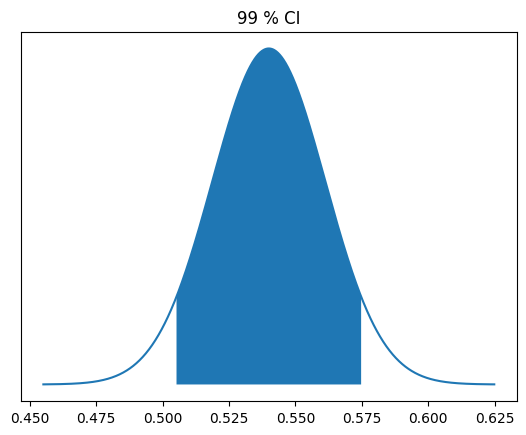

In [38]:
## b
level_of_confidence = 0.90

sample_mean = 0.54
sample_variance = 0.45
sample_size = 1000

sample_standard_deviation = np.sqrt(sample_variance)

SE = sample_standard_deviation/np.sqrt(sample_size)

CI = norm.interval(level_of_confidence, loc=sample_mean, scale=SE)

print('A ' + repr(level_of_confidence*100) + ' % confidence interval for the sample mean is [' + repr(round(CI[0],4)) + ' ; '
      + repr(round(CI[1],4)) + ']')

x = np.linspace(sample_mean-4*SE, sample_mean+4*SE, 1000)

draw_z_score(x, (CI[0] <= x) & (x <= CI[1]), sample_mean, SE, '99 % CI')

In [42]:

sample_mean = 0.54
alpha = 0.01
sample_size = 1000
hypothesis_mean = 1/2

sample_standard_deviation = np.sqrt(sample_variance)

def z_crit(alpha, two_sided=True): # two sided critical value, change for 1-alfa for one sided
    if two_sided:
        return stats.norm.ppf(1- alpha/2)
    else:
        return stats.norm.ppf(1-alpha)
    
display(z_crit(alpha))

test_statistic_hypothesis = (sample_mean-hypothesis_mean)/( sample_standard_deviation/np.sqrt(sample_size))
display(Math( 't_{0}='+ latex(round(test_statistic_hypothesis,4))))

## two sided test, for one sided remove the multplication to 2
p_value = 2*norm.sf(np.abs(test_statistic_hypothesis))
display(Math( 'P-value='+ latex(round(p_value,6))))

if p_value < alpha:
    print("Reject since " + repr(p_value) + ' < ' + repr(alpha))
else:
    print("Fail to reject since " + repr(p_value) + ' > ' + repr(alpha))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Fail to reject since 0.05934643879191963 > 0.01


## Exercise 6

In [43]:
display(Image(url='../images/Screenshot 2023-06-07 at 11.10.28.png', width=1200, height=200,unconfined=True))

In [50]:
n = 20000
p = (1/100)/100

display(Math("P(X \geq 5) = " + repr(round(1-binom.cdf(4, n, p), 4))))



<IPython.core.display.Math object>

## Exercise 7

In [52]:
display(Image(url='../images/Screenshot 2023-06-07 at 11.27.26.png', width=1200, height=400,unconfined=True))

In [128]:
y = np.array([122, 132, 145, 161, 178 , 190 ])
x = np.array([8,10,12,14,16,18])

sample_size_x = np.size(x)

x_mean =np.mean(x)
y_mean = np.mean(y)

Sxy = np.sum(x*y) - sample_size_x*x_mean*y_mean
Sxx = np.sum(x*x) - ((np.sum(x)**2))/sample_size_x

b1 = Sxy/Sxx
b0 = y_mean - b1*x_mean


# regression function
def f(x):
    return b1*x + b0

y_hat = f(x)

SSe = np.sum((y-y_hat)**2)

var_hat = SSe/(sample_size_x-2)

sb1 = np.sqrt(var_hat/Sxx)

sb0 = math.sqrt(var_hat*(1/sample_size_x + x_mean**2 / Sxx))

display (round(sb1, 3), round(sb0, 4) )


In [130]:
## b

y = np.array([122, 132, 145, 161, 178 , 190 ])
x = np.array([8,10,12,14,16,18])

sample_size_x = np.size(x)

x_mean =np.mean(x)
y_mean = np.mean(y)

Sxy = np.sum(x*y) - sample_size_x*x_mean*y_mean
Sxx = np.sum(x*x) - ((np.sum(x)**2))/sample_size_x

b1 = Sxy/Sxx
b0 = y_mean - b1*x_mean


# regression function
def f(x):
    return b1*x + b0

display(round(f(5)))

## Exercise 8

In [59]:
display(Image(url='../images/Screenshot 2023-06-07 at 11.29.20.png', width=1200, height=150,unconfined=True))

display(Image(url='../images/Screenshot 2023-06-07 at 11.43.13.png', width=1200, height=250,unconfined=True))

In [79]:

## Always remember to check if the true variance and mean is given !!!!!!!!
sample_size = 25
ddof = sample_size - 1

sample_mean = 310
sample_standard_deviation = 6 
lower_confindence_mean = 306.6551
upper_confindence_mean = 313.3449

t_0 = (upper_confindence_mean - sample_mean)/ (sample_standard_deviation/np.sqrt(sample_size))
print(t_0)
CI = t.cdf(t_0,ddof)

alpha = 2*(1-CI)
print(alpha)

2.787416666666663
0.010223424815879234


## Exercise 9

In [80]:
display(Image(url='../images/Screenshot 2023-06-07 at 12.40.30.png', width=1200, height=250,unconfined=True))

In [87]:
x,y = sp.symbols('x y ')
fxy = 8*x*y

## P(Y< 1/2 | X > 1/2) 
p_x_intersect_y = sp.integrate(fxy, (y,0, R(1,2)),(x,R(1,2),1))
px = sp.integrate(fxy, (y,0, x),(x,R(1,2),1))

result = p_x_intersect_y/px

display(result)

## Exercise 10

In [89]:
display(Image(url='../images/Screenshot 2023-06-07 at 12.54.22.png', width=1200, height=400,unconfined=True))

In [97]:
## a prob team A does not score  and prob team A does not score
## if the events are independent multiply
time = 90

l1 = 0.02 * 90
l2 = 0.03 * 90

p1 = poisson.pmf(0, l1)
p2 = poisson.pmf(0, l2)

p_and = p1 * p2 
display(round(p_and,2))


In [99]:
## b prob any of the team scores total_lambda. then prob > 2 
## if the events are independent: AND multiply, OR: add

time = 90

l1 = 0.02 * 90
l2 = 0.03 * 90

total_lambda = l1+l2
## use the trick with X >= 2 => 1 - X <= 2 
result = 1 - poisson.cdf(1, total_lambda)

display(round(result,2))

In [105]:
## c p_and = p1 * p2
## if the events are independent: AND multiply, OR: add

time = 90

l1 = 0.02 * time
l2 = 0.03 * time

p1 = poisson.pmf(1, l1)
p2 = poisson.pmf(2, l2)

result = p1* p2
display(round(result,2))